In [1]:
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import nibabel as nib
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.plotting import plot_design_matrix
import os
import pandas as pd

import sys
sys.path.append('/Users/zeynepenkavi/Documents/RangelLab/DescribedVsLearned_fmri/analysis/01_level1')
from level1_utils import get_confounds, get_events, get_from_sidecar

/Users/zeynepenkavi/.pyenv/versions/3.8.3/envs/py-dvl-fmri/lib/python3.8/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '
/Users/zeynepenkavi/.pyenv/versions/3.8.3/envs/py-dvl-fmri/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
data_path = '/Users/zeynepenkavi/Downloads/GTavares_2017_arbitration/bids_nifti_wface/'
behavior_path = '/Users/zeynepenkavi/Downloads/GTavares_2017_arbitration/behavioral_data/all_trials.csv'

subnum = '01'
runnum = '4'

In [3]:
tr = get_from_sidecar(subnum, runnum, 'RepetitionTime', data_path)
n_scans = get_from_sidecar(subnum, runnum, 'dcmmeta_shape', data_path)[3]
frame_times = np.arange(n_scans) * tr 

In [4]:
formatted_events = get_events(subnum, runnum, data_path, behavior_path)
formatted_events

,onset,duration,trial_type,modulation
0,0.006705,8.506799,cross,1.000000e+00
1,0.006705,8.506799,crossRt,-2.487215e+00
2,6.026289,2.034288,fractalProb,1.000000e+00
3,6.026289,2.034288,fractalProbParam,5.551115e-17
4,8.060577,0.972081,choiceLeft,0.000000e+00
...,...,...,...,...
775,868.001588,0.972081,valDiff,6.767944e-02
776,868.001588,0.972081,noconflict,0.000000e+00
777,869.535580,3.000000,rewardParam,5.616667e-01
778,869.535580,3.000000,reward,1.000000e+00


In [5]:
formatted_confounds = get_confounds(subnum, runnum, data_path)
formatted_confounds

,trans_x,trans_x_derivative1,trans_x_derivative1_power2,trans_x_power2,trans_y,trans_y_derivative1,trans_y_power2,trans_y_derivative1_power2,trans_z,trans_z_derivative1,...,rot_y_derivative1,rot_y_derivative1_power2,rot_y_power2,rot_z,rot_z_derivative1,rot_z_derivative1_power2,rot_z_power2,std_dvars,framewise_displacement,scrub
0,0.000105,0.000000,0.000000,1.099331e-08,0.135298,0.000000,0.018306,0.000000,0.094874,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000199,0.000000e+00,0.000000e+00,3.971491e-08,0.000000,0.000000,0
1,-0.006935,-0.007040,0.000050,4.810033e-05,0.150102,0.014804,0.022531,0.000219,0.111197,0.016323,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000199,-1.160000e-07,1.345600e-14,3.966869e-08,1.034624,0.055784,0
2,0.000170,0.007106,0.000050,2.902628e-08,0.280912,0.130810,0.078912,0.017111,0.114642,0.003445,...,2.646980e-23,7.006503e-46,7.006503e-46,0.000236,3.700300e-05,1.369222e-09,5.577769e-08,1.004523,0.161243,0
3,-0.008216,-0.008386,0.000070,6.750134e-05,0.083636,-0.197276,0.006995,0.038918,0.099874,-0.014768,...,-1.309600e-04,1.715052e-08,1.715052e-08,0.000559,3.228690e-04,1.042444e-07,3.125280e-07,1.065194,0.259239,0
4,-0.000147,0.008069,0.000065,2.161517e-08,0.124338,0.040702,0.015460,0.001657,0.104246,0.004372,...,-4.250300e-05,1.806505e-09,3.008941e-08,0.000200,-3.592150e-04,1.290354e-07,3.993083e-08,0.921062,0.097847,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0.294746,-0.009742,0.000095,8.687520e-02,-0.128921,0.120131,0.016621,0.014431,-1.203250,0.039600,...,1.349000e-04,1.819801e-08,4.591255e-05,0.013357,-9.321000e-04,8.688104e-07,1.784041e-04,0.922020,0.271278,0
888,0.285113,-0.009633,0.000093,8.128942e-02,-0.201116,-0.072195,0.040448,0.005212,-1.163900,0.039350,...,5.327800e-04,2.838545e-07,3.897630e-05,0.012920,-4.364000e-04,1.904450e-07,1.669367e-04,0.971675,0.265102,0
889,0.287875,0.002762,0.000008,8.287202e-02,-0.339922,-0.138806,0.115547,0.019267,-1.185890,-0.021990,...,-4.759300e-04,2.265094e-07,4.514536e-05,0.013716,7.956000e-04,6.329794e-07,1.881287e-04,0.994414,0.276475,0
890,0.294637,0.006762,0.000046,8.681096e-02,-0.233689,0.106233,0.054611,0.011285,-1.193450,-0.007560,...,-9.045000e-05,8.181202e-09,4.636902e-05,0.013695,-2.090000e-05,4.368100e-10,1.875558e-04,0.945649,0.148082,0


In [6]:
design_matrix = make_first_level_design_matrix(frame_times, 
                                               formatted_events, 
                                               drift_model='cosine', 
                                               add_regs= formatted_confounds, 
                                               hrf_model='spm')

A 'modulation' column was found in the given events data and is used.


/Users/zeynepenkavi/.pyenv/versions/3.8.3/envs/py-dvl-fmri/lib/python3.8/site-packages/nilearn/_utils/glm.py:310: UserWarning: Matrix is singular at working precision, regularizing...
  warn('Matrix is singular at working precision, regularizing...')


<AxesSubplot:label='conditions', ylabel='scan number'>

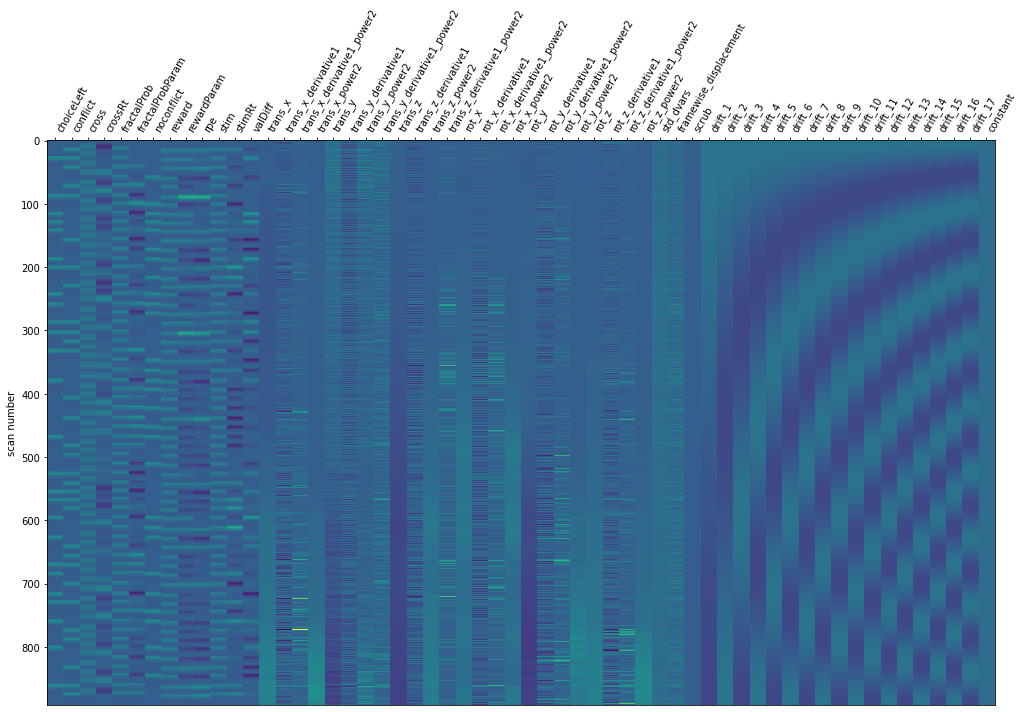

In [7]:
plot_design_matrix(design_matrix)

<AxesSubplot:label='conditions', ylabel='scan number'>

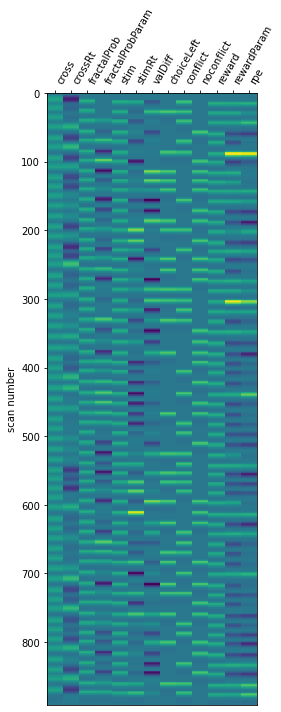

In [8]:
beh_regs = ['cross', 'crossRt', 'fractalProb', 'fractalProbParam', 'stim', 'stimRt', 'valDiff', 'choiceLeft', 'conflict', 'noconflict', 'reward', 'rewardParam', 'rpe']
plot_design_matrix(design_matrix[beh_regs])